In [3]:
import pandas as pd
df=pd.read_csv("fraudulent_claims_dataset")
df

,Claim_ID,Claim_Date,Customer_ID,Claim_Amount,Claim_Type,Suspicious_Flags,Fraud_Label
0,C0001,2024-05-10,P8184,28786.03,Home,0,0
1,C0002,2024-11-10,P6796,40964.11,Medical,0,0
2,C0003,2022-05-02,P8141,37602.18,Medical,0,0
3,C0004,2023-04-12,P2622,44309.64,Home,0,0
4,C0005,2022-11-27,P9041,15339.30,Home,0,0
...,...,...,...,...,...,...,...
995,C0996,2022-05-08,P7251,30502.52,Home,0,0
996,C0997,2022-02-11,P8295,3574.86,Home,0,0
997,C0998,2022-02-10,P4300,32530.04,Home,0,0
998,C0999,2024-07-22,P7279,19489.00,vechile,0,0


In [5]:
df.isnull().sum()

Claim_ID            0
Claim_Date          0
Customer_ID         0
Claim_Amount        0
Claim_Type          0
Suspicious_Flags    0
Fraud_Label         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Claim_ID          1000 non-null   object 
 1   Claim_Date        1000 non-null   object 
 2   Customer_ID       1000 non-null   object 
 3   Claim_Amount      1000 non-null   float64
 4   Claim_Type        1000 non-null   object 
 5   Suspicious_Flags  1000 non-null   int64  
 6   Fraud_Label       1000 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [9]:
df.drop(columns=['Claim_ID','Claim_Date','Customer_ID'],inplace=True)

In [11]:
df=df[['Claim_Amount','Claim_Type','Suspicious_Flags','Fraud_Label']]

In [15]:
from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder()
claim=oh.fit_transform(df[['Claim_Type']]).toarray()
claim_df=pd.DataFrame(claim,columns=oh.get_feature_names_out(['Claim_Type'])).astype(int)
df=df.drop(columns=['Claim_Type']).reset_index(drop=True)
df=pd.concat([df,claim_df],axis=1)

In [17]:
df['Claim_Amount']=df['Claim_Amount'].astype("int64")
df.head()

,Claim_Amount,Suspicious_Flags,Fraud_Label,Claim_Type_Home,Claim_Type_Medical,Claim_Type_vechile
0,28786,0,0,1,0,0
1,40964,0,0,0,1,0
2,37602,0,0,0,1,0
3,44309,0,0,1,0,0
4,15339,0,0,1,0,0


In [21]:
x=df[['Claim_Amount','Suspicious_Flags','Claim_Type_Home','Claim_Type_Medical','Claim_Type_vechile']]

In [23]:
y=df['Fraud_Label']

In [25]:
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

model = LogisticRegression(class_weight='balanced',solver='liblinear')
model.fit(x_train,y_train)


LogisticRegression(class_weight='balanced', solver='liblinear')

In [61]:
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [63]:
ypred=model.predict(x_test)
from sklearn.metrics import classification_report
fullreport=classification_report(y_test,ypred)
print(fullreport)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       185
           1       0.71      1.00      0.83        15

    accuracy                           0.97       200
   macro avg       0.86      0.98      0.91       200
weighted avg       0.98      0.97      0.97       200



In [65]:
ypred=svm.predict(x_test)
from sklearn.metrics import classification_report
fullreport=classification_report(y_test,ypred)
print(fullreport)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       185
           1       0.00      0.00      0.00        15

    accuracy                           0.93       200
   macro avg       0.46      0.50      0.48       200
weighted avg       0.86      0.93      0.89       200



C:\Users\SukilPriya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SukilPriya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SukilPriya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
x

,Claim_Amount,Suspicious_Flags,Claim_Type_Home,Claim_Type_Medical,Claim_Type_vechile
0,28786,0,1,0,0
1,40964,0,0,1,0
2,37602,0,0,1,0
3,44309,0,1,0,0
4,15339,0,1,0,0
...,...,...,...,...,...
995,30502,0,1,0,0
996,3574,0,1,0,0
997,32530,0,1,0,0
998,19489,0,0,0,1


In [47]:
#inputdata = (16171, 0, 0, 0, 1)-prediction=0
#inputdata=(70000, 1, 0, 1, 0)-prediction=1

import numpy as np

inputdata=(70000, 1, 0, 1, 0)
inputdataarray=np.asarray(inputdata)
inputdatareshape=inputdataarray.reshape((1,-1))
prediction=model.predict(inputdatareshape)
print("\n🧠 Predicted Fraud Label:",*prediction)


🧠 Predicted Fraud Label: 1


C:\Users\SukilPriya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [67]:
import pickle 
with open('frauddetection.pkl','wb')as file:
    pickle.dump(model,file)

In [ ]:
#Claim_Amount = 70000
#Suspicious_Flags = 1
#Claim_Type_Home = 0
#Claim_Type_Medical = 1
#Claim_Type_vechile = 0 #Fraudulent Claim Detected!

#Claim_Amount = 16000
#Suspicious_Flags = 0
#Claim_Type_Home = 1
#Claim_Type_Medical = 0
#Claim_Type_vechile = 0 #: Genuine Claim


🔍 Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Claim_ID            1000 non-null   object 
 1   Claim_Date          1000 non-null   object 
 2   Customer_ID         1000 non-null   object 
 3   Claim_Amount        1000 non-null   float64
 4   Claim_Type          1000 non-null   object 
 5   Suspicious_Flags    1000 non-null   int64  
 6   Fraud_Label         1000 non-null   int64  
 7   Claim_Type_Encoded  1000 non-null   int32  
dtypes: float64(1), int32(1), int64(2), object(4)
memory usage: 58.7+ KB
None

📊 Class Distribution:

Fraud_Label
0    941
1     59
Name: count, dtype: int64


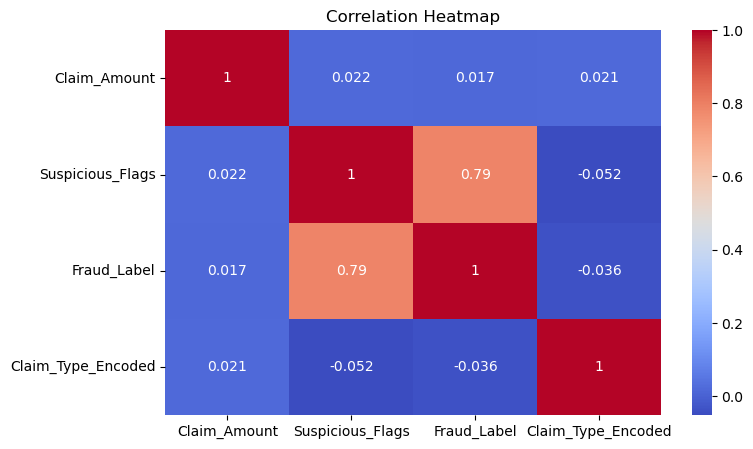


📈 Isolation Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       941
           1       0.70      0.59      0.64        59

    accuracy                           0.96      1000
   macro avg       0.84      0.79      0.81      1000
weighted avg       0.96      0.96      0.96      1000



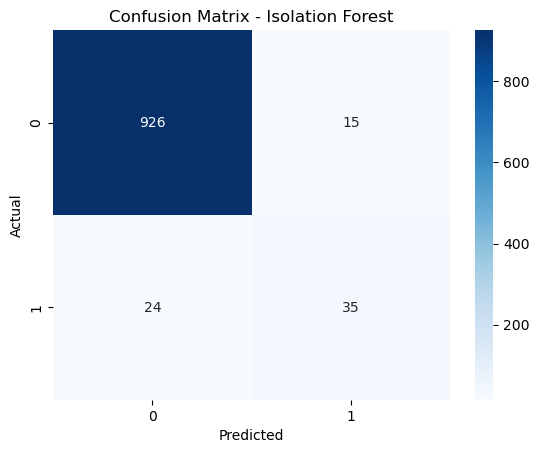


🔗 Association Rules (with lift >= 1.0):

                                 antecedents  \
0                       (Claim_Type_vechile)   
1                       (Suspicious_Flags_0)   
2                       (Claim_Type_vechile)   
3                            (Fraud_Label_0)   
4                            (Fraud_Label_0)   
5                       (Suspicious_Flags_0)   
6                            (Fraud_Label_1)   
7                       (Suspicious_Flags_1)   
8           (Claim_Type_Home, Fraud_Label_0)   
9      (Claim_Type_Home, Suspicious_Flags_0)   
10                           (Fraud_Label_0)   
11                      (Suspicious_Flags_0)   
12       (Claim_Type_Medical, Fraud_Label_0)   
13  (Claim_Type_Medical, Suspicious_Flags_0)   
14                           (Fraud_Label_0)   
15                      (Suspicious_Flags_0)   
16       (Claim_Type_vechile, Fraud_Label_0)   
17  (Claim_Type_vechile, Suspicious_Flags_0)   
18       (Suspicious_Flags_0, Fraud_Label_0)  

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.frequent_patterns import apriori, association_rules

# Load dataset
df = pd.read_csv("fraudulent_claims_dataset")  # Replace with actual path

# Encode categorical features
le = LabelEncoder()
df['Claim_Type_Encoded'] = le.fit_transform(df['Claim_Type'])

# Basic EDA
print("\n🔍 Dataset Info:\n")
print(df.info())

print("\n📊 Class Distribution:\n")
print(df['Fraud_Label'].value_counts())

# Heatmap for correlations
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# -----------------------------
# 1. Anomaly Detection - Isolation Forest
# -----------------------------
features = ['Claim_Amount', 'Claim_Type_Encoded', 'Suspicious_Flags']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly_Score'] = iso_forest.fit_predict(X_scaled)
df['Anomaly_Label'] = df['Anomaly_Score'].apply(lambda x: 1 if x == -1 else 0)

# Evaluate against actual fraud labels
print("\n📈 Isolation Forest Classification Report:")
print(classification_report(df['Fraud_Label'], df['Anomaly_Label']))

# Confusion Matrix
sns.heatmap(confusion_matrix(df['Fraud_Label'], df['Anomaly_Label']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Isolation Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# -----------------------------
# 2. Association Rule Mining
# -----------------------------
# Convert necessary columns to categorical for rule mining
basket = df[['Claim_Type', 'Suspicious_Flags', 'Fraud_Label']].copy()
basket['Suspicious_Flags'] = basket['Suspicious_Flags'].astype(str)
basket['Fraud_Label'] = basket['Fraud_Label'].astype(str)
basket_encoded = pd.get_dummies(basket)

# Generate frequent itemsets
frequent_itemsets = apriori(basket_encoded, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

print("\n🔗 Association Rules (with lift >= 1.0):\n")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Save results
df.to_csv("fraud_detection_labeled.csv", index=False)
print("\n✅ Results saved to 'fraud_detection_labeled.csv'")
